In [72]:
import pandas as pd
import seaborn as sns
import squarify
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv('cleaned_data.csv')
df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,fulfilled-by
0,2022-04-30,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081,False,Easy Ship
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085,False,Easy Ship
2,2022-04-30,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210,True,Other methods
3,2022-04-30,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008,False,Easy Ship
4,2022-04-30,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073,False,Other methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126430,2022-05-31,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,517.00,HYDERABAD,TELANGANA,500013,False,Other methods
126431,2022-05-31,Shipped,Amazon,Expedited,T-shirt,M,Shipped,1,999.00,GURUGRAM,HARYANA,122004,False,Other methods
126432,2022-05-31,Shipped,Amazon,Expedited,Blazzer,XXL,Shipped,1,690.00,HYDERABAD,TELANGANA,500049,False,Other methods
126433,2022-05-31,Shipped,Amazon,Expedited,T-shirt,XS,Shipped,1,1199.00,Halol,Gujarat,389350,False,Other methods


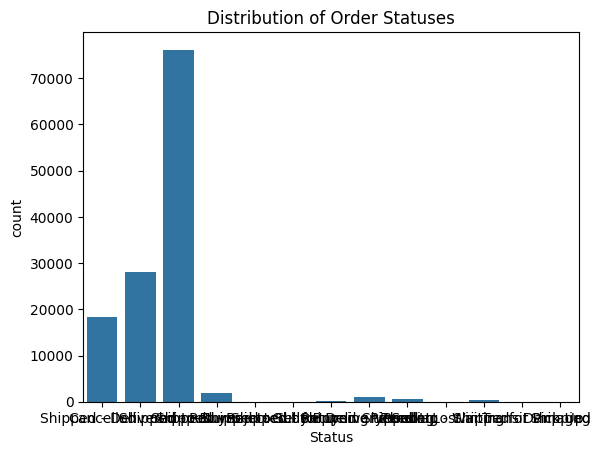

In [74]:
#Q1 What is the distribution of order statuses?

sns.countplot(data=df, x='Status',)
plt.title('Distribution of Order Statuses')
plt.show()


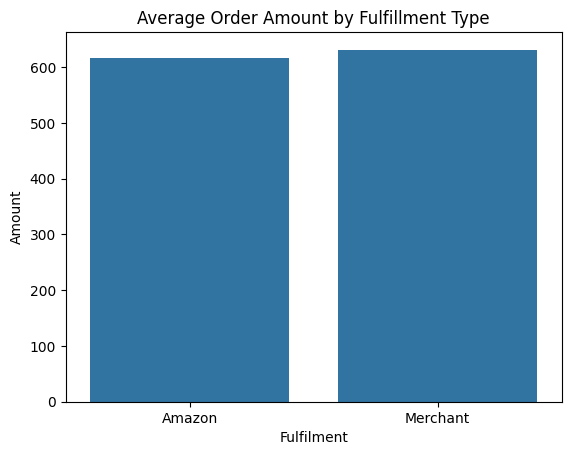

In [75]:
#Q2 What are the average order amounts for each fulfillment type?

avg_order_amount = df.groupby('Fulfilment')['Amount'].mean().reset_index()
sns.barplot(data=avg_order_amount, x='Fulfilment', y='Amount')
plt.title('Average Order Amount by Fulfillment Type')
plt.show()


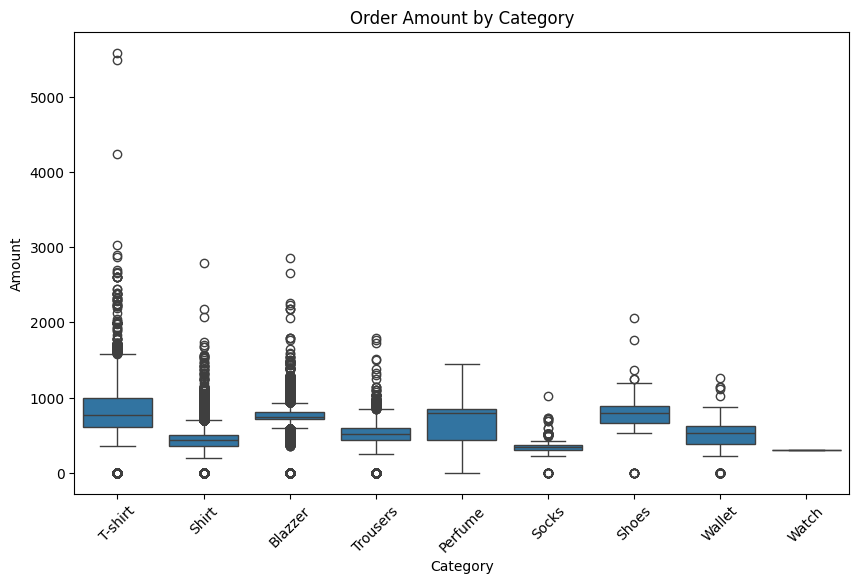

In [76]:
#Q3 How does order amount vary across different categories?

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Amount')
plt.title('Order Amount by Category')
plt.xticks(rotation=45)
plt.show()


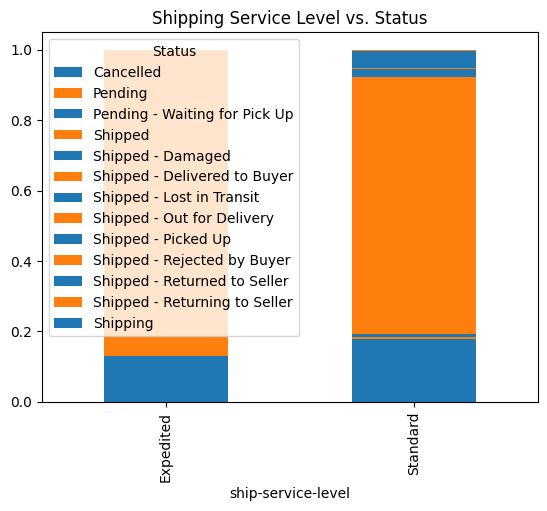

In [77]:
#Q4 What is the relationship between the shipping service level and delivery status?

ship_status_counts = pd.crosstab(df['ship-service-level'], df['Status'], normalize='index')
ship_status_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Shipping Service Level vs. Status')
plt.show()


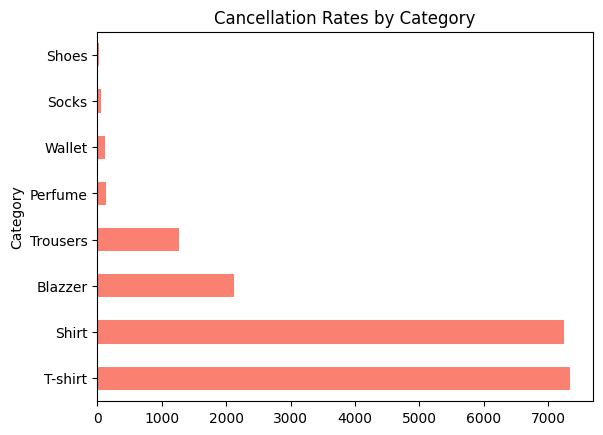

In [78]:
#Q5 What are the cancellation rates for different categories?

cancel_rate = df[df['Status'] == 'Cancelled'].groupby('Category').size().sort_values(ascending=False)
cancel_rate.plot(kind='barh', color='salmon')
plt.title('Cancellation Rates by Category')
plt.show()


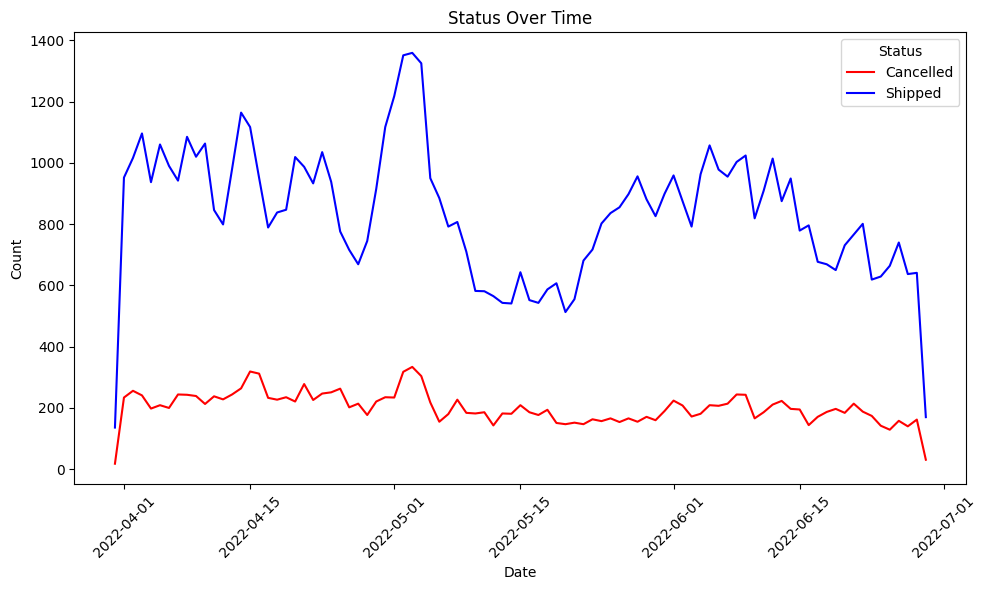

In [79]:
#Q6 How does the amount of orders vary over time?

df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[df['Status'].isin(['Shipped', 'Cancelled'])]

status_over_time = df_filtered.groupby(['Date', 'Status']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=status_over_time, x='Date', y='Count', hue='Status', palette={'Shipped': 'blue', 'Cancelled': 'red'})
plt.title('Status Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


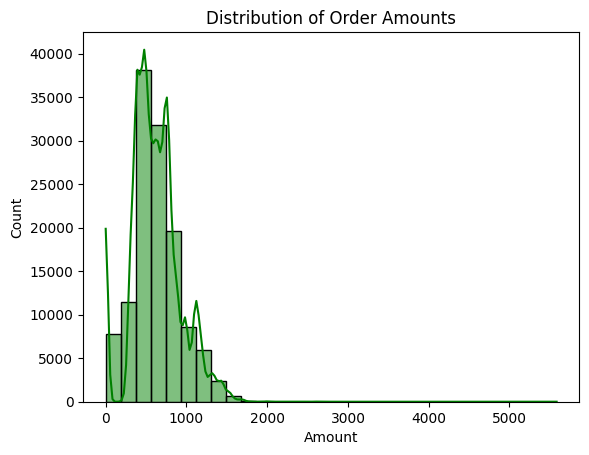

In [80]:
#Q7 How is the order amount distributed?

sns.histplot(df['Amount'], kde=True, color='g', bins=30)
plt.title('Distribution of Order Amounts')
plt.show()


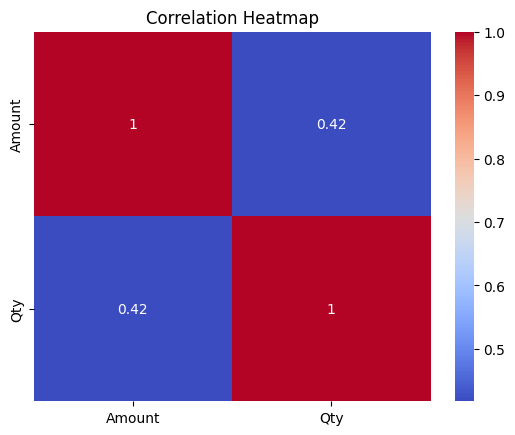

In [81]:
#Q8 What is the correlation between the numeric variables?

corr_matrix = df[['Amount', 'Qty']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


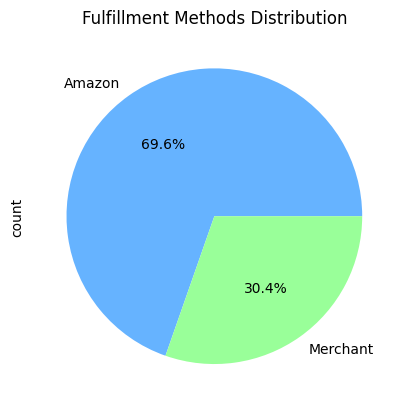

In [82]:
#Q9 What are the fulfillment methods used most frequently?

fulfilment_counts = df['Fulfilment'].value_counts()
fulfilment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Fulfillment Methods Distribution')
plt.show()


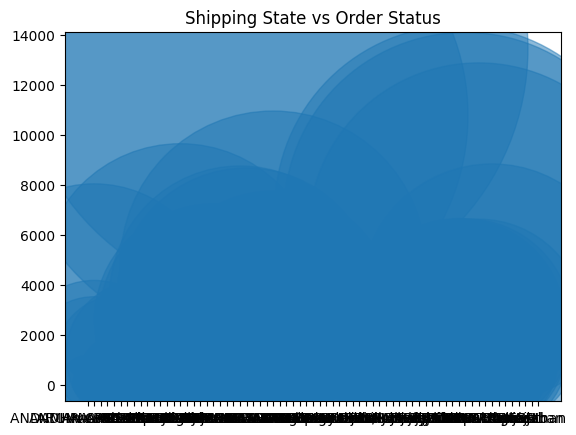

In [83]:
#Q10 What is the relationship between shipping location and order status?

ship_state_counts = df.groupby(['ship-state', 'Status']).size().reset_index(name='Count')
plt.scatter(ship_state_counts['ship-state'], ship_state_counts['Count'], s=ship_state_counts['Count']*10, alpha=0.5)
plt.title('Shipping State vs Order Status')
plt.show()


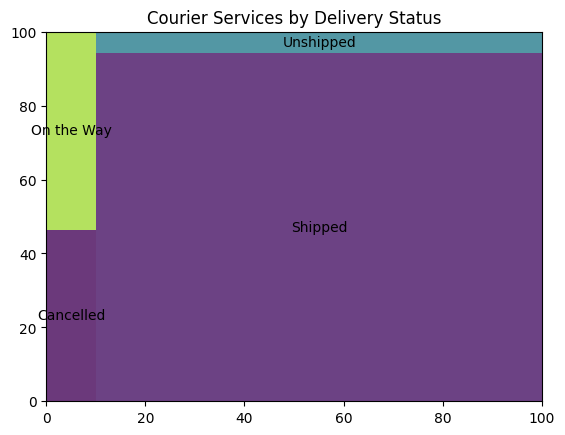

In [84]:
#Q11 How do different courier services affect delivery status?

courier_counts = df.groupby('Courier Status').size().reset_index(name='Count')
squarify.plot(sizes=courier_counts['Count'], label=courier_counts['Courier Status'], alpha=.8)
plt.title('Courier Services by Delivery Status')
plt.show()


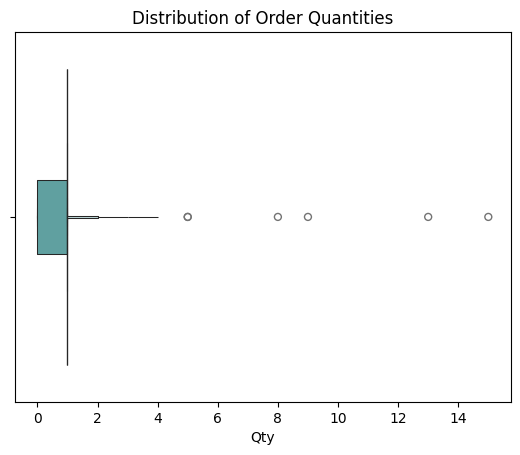

In [85]:
#Q12 What is the distribution of order quantity per shipment?

sns.boxenplot(data=df, x='Qty', color='teal')
plt.title('Distribution of Order Quantities')
plt.show()

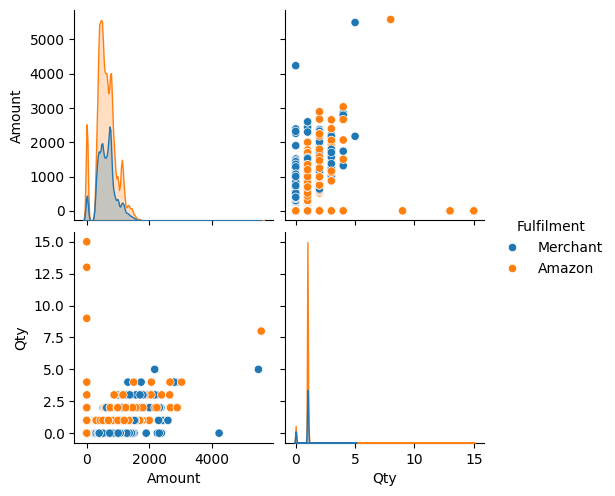

In [86]:
#Q13 Are there any interesting relationships between multiple variables?

sns.pairplot(df[['Amount', 'Qty', 'ship-service-level', 'Fulfilment']], hue='Fulfilment')
plt.show()
